In [6]:
%pip install wordcloud

You should consider upgrading via the '/Users/hexiangning/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install nltk.corpus

ERROR: Could not find a version that satisfies the requirement nltk.corpus (from versions: none)
ERROR: No matching distribution found for nltk.corpus
You should consider upgrading via the '/Users/hexiangning/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import sys
print(sys.executable)

/Users/hexiangning/anaconda3/bin/python


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [55]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Total number of question pairs for training:404290
Total percentage of duplicates:36.92
Total number of questions in the training data: 537933
The number of questions who appeared more than once:111780


Text(0, 0.5, 'Number of questions')

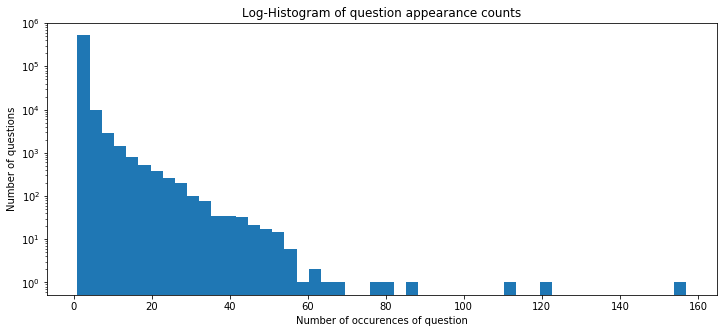

In [12]:
print('Total number of question pairs for training:{}'.format(len(train)))
print('Total percentage of duplicates:{}'.format(round(train['is_duplicate'].mean()*100,2)))
qids = pd.Series(train['qid1'].tolist()+train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('The number of questions who appeared more than once:{}'.format(np.sum(qids.value_counts()>1)))
plt.figure(figsize = (12,5))
plt.hist(qids.value_counts(), bins = 50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

# Text Analysis

/Users/hexiangning/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'number of characters in each question')

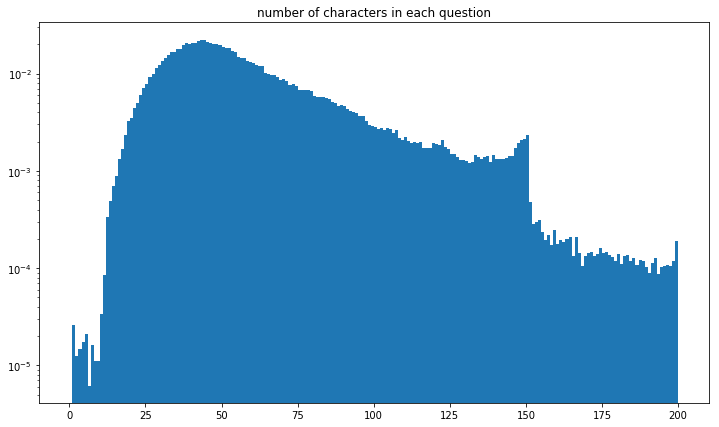

In [13]:
train_qs = pd.Series(train['question1'].tolist()+train['question2'].tolist()).astype(str)
dist_train = train_qs.apply(len)
plt.figure(figsize = (12,7))
plt.hist(dist_train, bins = 200,range = [0,200],normed = True)
plt.yscale('log',nonposy = 'clip')
plt.title('number of characters in each question')

In [14]:
dist_train

0          66
1          51
2          73
3          50
4          76
5          86
6          19
7          30
8          31
9          60
10         57
11         43
12         36
13         43
14        141
15         93
16         28
17         57
18         82
19         60
20         26
21         37
22         47
23         24
24         79
25         79
26         24
27         49
28         38
29         38
         ... 
808550     40
808551     64
808552     32
808553     65
808554     42
808555     33
808556    179
808557     80
808558     44
808559     63
808560     45
808561     65
808562     87
808563     83
808564     51
808565     79
808566     24
808567     32
808568     52
808569     77
808570     55
808571     68
808572     47
808573     61
808574     51
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

In [15]:
type(" ".join(train_qs.astype(str)))

str

In [42]:
import nltk
from nltk.corpus import stopwords

#nltk.download('punkt')
#nltk.download('stopwords')
stopword_list = stopwords.words('english')    
tokens = nltk.word_tokenize(" ".join(train_qs.astype(str)))
tokens

['What',
 'is',
 'the',
 'step',
 'by',
 'step',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market',
 'in',
 'india',
 '?',
 'What',
 'is',
 'the',
 'story',
 'of',
 'Kohinoor',
 '(',
 'Koh-i-Noor',
 ')',
 'Diamond',
 '?',
 'How',
 'can',
 'I',
 'increase',
 'the',
 'speed',
 'of',
 'my',
 'internet',
 'connection',
 'while',
 'using',
 'a',
 'VPN',
 '?',
 'Why',
 'am',
 'I',
 'mentally',
 'very',
 'lonely',
 '?',
 'How',
 'can',
 'I',
 'solve',
 'it',
 '?',
 'Which',
 'one',
 'dissolve',
 'in',
 'water',
 'quikly',
 'sugar',
 ',',
 'salt',
 ',',
 'methane',
 'and',
 'carbon',
 'di',
 'oxide',
 '?',
 'Astrology',
 ':',
 'I',
 'am',
 'a',
 'Capricorn',
 'Sun',
 'Cap',
 'moon',
 'and',
 'cap',
 'rising',
 '...',
 'what',
 'does',
 'that',
 'say',
 'about',
 'me',
 '?',
 'Should',
 'I',
 'buy',
 'tiago',
 '?',
 'How',
 'can',
 'I',
 'be',
 'a',
 'good',
 'geologist',
 '?',
 'When',
 'do',
 'you',
 'use',
 'シ',
 'instead',
 'of',
 'し',
 '?',
 'Motorola',
 '(',
 'company',
 ')',
 ':',
 

In [43]:
newword = [token.strip() for token in tokens]
newword = ' '.join([token for token in tokens if token.lower() not in stopword_list])

(-0.5, 1439.5, 1079.5, -0.5)

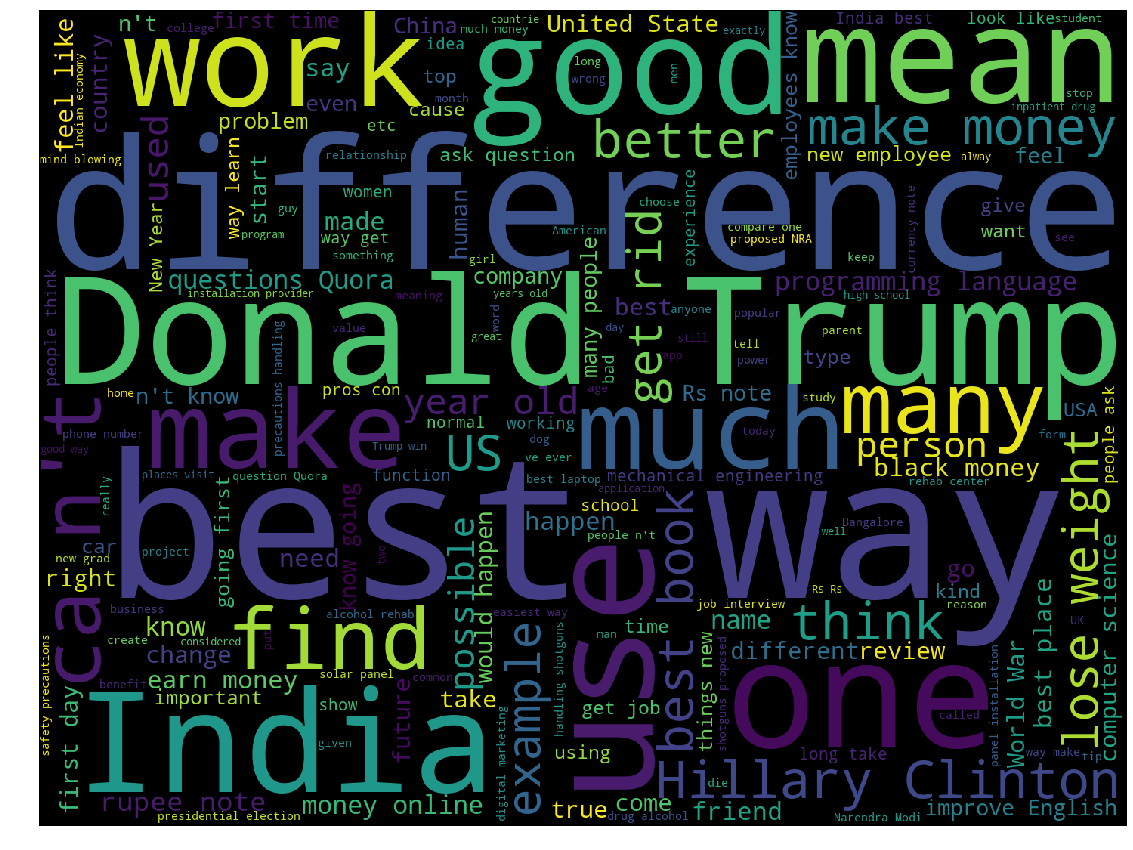

In [44]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(newword)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# semantic analysis

In [45]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


# initial feature analytics

/Users/hexiangning/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/hexiangning/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'word_match_share')

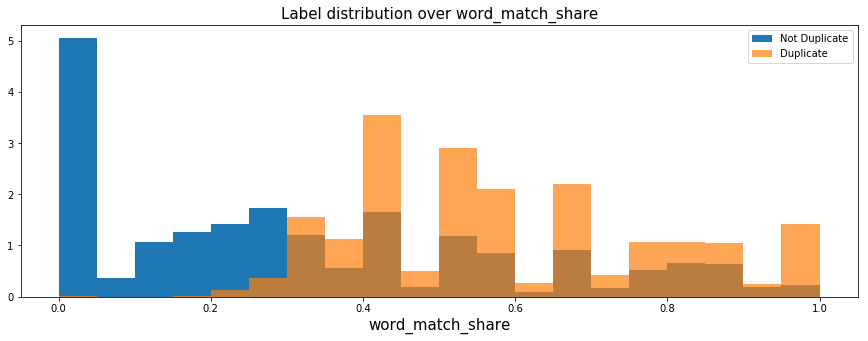

In [60]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stop:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stop:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

# TF-IDF

TF-IDF (term-frequency-inverse-document-frequency). This means that we weigh the terms by how uncommon they are, we set the frequency as 2, which means that if a word just appear once, This means that we weigh the terms by how uncommon they are, meaning that we care more about rare words existing in both questions than common one. This makes sense, as for example we care more about whether the word "exercise" appears in both than the word "and" - as uncommon words will be more indicative of the content.

In [47]:
from collections import Counter
# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [48]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('シ', 9.998000399920016e-05),
 ('し?', 9.998000399920016e-05),
 ('19-year-old.', 9.998000399920016e-05),
 ('1-855-425-3768', 9.998000399920016e-05),
 ('confederates', 9.998000399920016e-05),
 ('asahi', 9.998000399920016e-05),
 ('fab', 9.998000399920016e-05),
 ('109?', 9.998000399920016e-05),
 ('samrudi', 9.998000399920016e-05),
 ('fulfill?', 9.998000399920016e-05)]

In [51]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stop:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stop:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

/Users/hexiangning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/hexiangning/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/hexiangning/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'word_match_share')

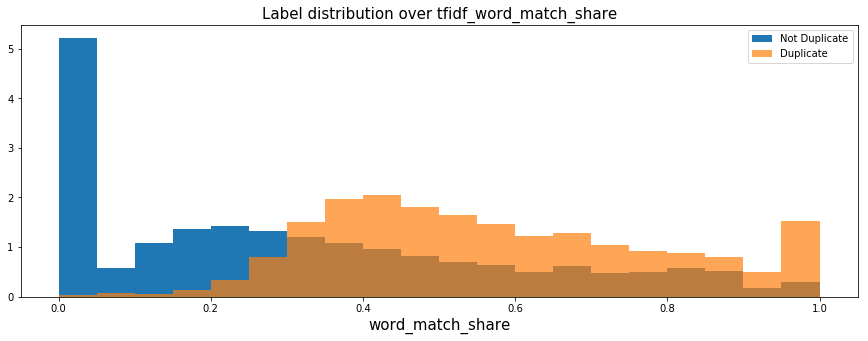

In [53]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

# XG boost

In [62]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = train['is_duplicate'].values

/Users/hexiangning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/hexiangning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [63]:
# Finally, we split some of the data off for validation
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

In [65]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.6855	valid-logloss:0.68617
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.629764	valid-logloss:0.630298
[20]	train-logloss:0.589492	valid-logloss:0.590934
[30]	train-logloss:0.560417	valid-logloss:0.561816
[40]	train-logloss:0.538756	valid-logloss:0.540458
[50]	train-logloss:0.521033	valid-logloss:0.524003
[60]	train-logloss:0.50908	valid-logloss:0.51137
[70]	train-logloss:0.498907	valid-logloss:0.501305
[80]	train-logloss:0.490861	valid-logloss:0.493719
[90]	train-logloss:0.484604	valid-logloss:0.487879
[100]	train-logloss:0.480071	valid-logloss:0.483042
[110]	train-logloss:0.476401	valid-logloss:0.479232
[120]	train-logloss:0.473404	valid-logloss:0.47625
[130]	train-logloss:0.470725	valid-logloss:0.474002
[140]	train-logloss:0.468717	valid-logloss:0.471862
[150]	train-logloss:0.46688	valid-logloss:0.470394
[160]	train-logloss:0.466084	valid-